# 100MLProjects - Project #1: Graduate Admissions Predicition

Dataset Source: https://www.kaggle.com/mohansacharya/graduate-admissions 

Date: June 12, 2020

### Lakshmanan Meiyappan
LinkedIn: https://www.linkedin.com/in/lakshmanan-meiyappan/

Github: https://github.com/laxmena/


***About:***

This is Project 1 of #100MLProjetcs (Read more: [Journey towards ML/DL Mastery](https://medium.com/@laxmena/my-journey-towards-ml-dl-mastery-100mlprojects-7baf78c0da64))

This dataset is a collection of different features that are considered during the admissions process for Masters program abroad.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset/GraduateAdmissions/Admission_Predict.csv')
dataset.head()
dataset.drop(columns=['Serial No.'], axis=1, inplace=True)

In [0]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Exploring Dataset


This dataset is created by Mohan Acharya to understand graduate admission process from an Indian Perspective.

Dataset contains features like GRE Scores, TOEFL, CGPA, SOP Rating, LOR Rating, Research Papers and University Ratings.

These features are used to predict the chance of admit for a given student.

Note: 'Chance of Admit' is the probability of getting an admission for the given college for masters program.

In [0]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


This is really fascinating data here.

The mean GRE Score is 316, and TOEFL is 107.

* **Inference:** GRE is really a challenging exam to tackle, and several Indian students have aced it. The mean score 316 is by itself a very good score.*

**Average CGPA: 8.59** (My CGPA during Undergrad is 8.59)

* **Inference:** Students who try to pursue masters program have performed incredibly well in their undergrauate programs.*

In [0]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing data's in the dataset, the data is already cleaned.

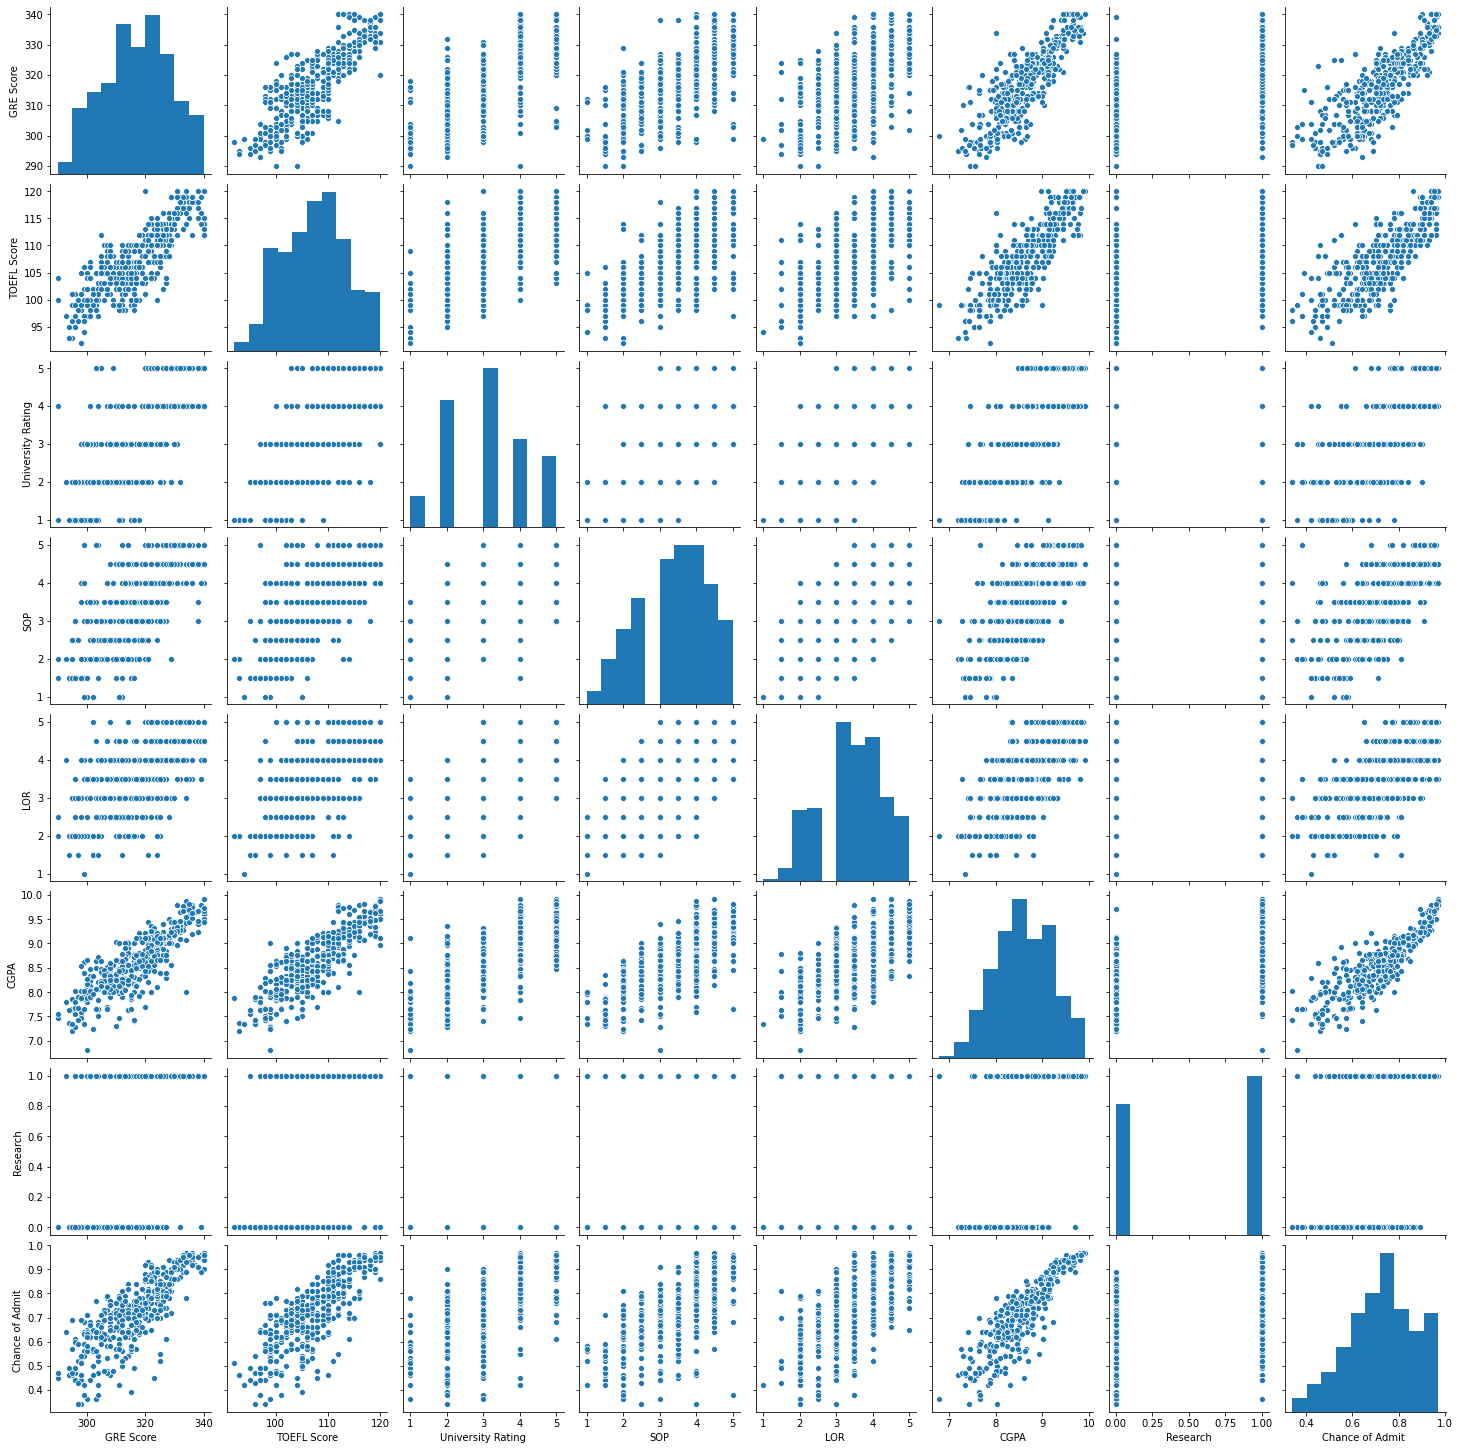

In [0]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

**Inference:**

From my countless hours surfing internet and gathering details about masters program and application process, one feature that all the blogs and articles agreed was - A good 'SOP' could compensate for other weak scores(like GRE, CGPA)

But this visualization tells us a different story. SOP and LOR are required features, but they are not the game changers. An average SOP with 3.0 rating can still get higher chance of admits in graduate colleges.

**University Rating vs SOP/LOR**:
- SOP's didnt seem to play a significant role for Graduate colleges with 4.0 rating
- Universities with 5.0 rating, has no admissions for applicants with SOP's less than 3.0 score.  

**Research Papers**:
- Research papers doesnt seem to play a significant role in the outcome of the admissions here.


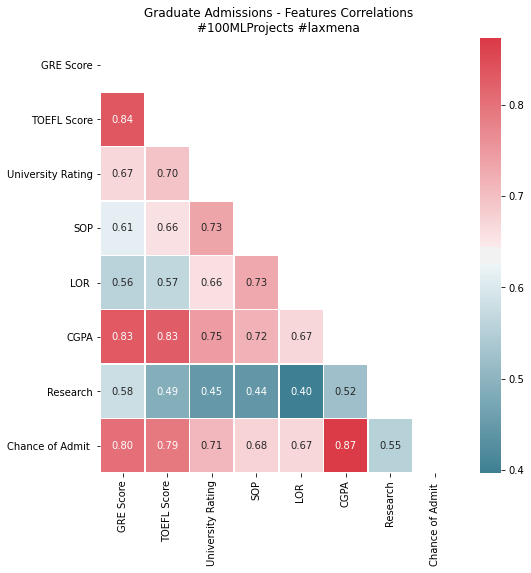

In [0]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Graduate Admissions - Features Correlations\n#100MLProjects #laxmena')
plt.show()
fig.savefig('Correlation.png')

### GRE Score

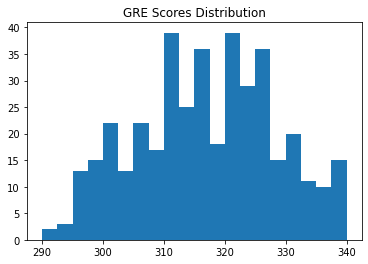

In [0]:
plt.hist(dataset.iloc[:,0].values, bins=20)
plt.title('GRE Scores Distribution')
plt.show()

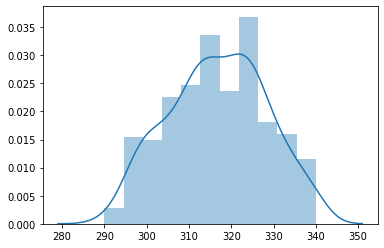

In [0]:
import seaborn as sns

sns.distplot(dataset.iloc[:,0].values)

In [0]:
# GRE Scores
gre_median = np.median(dataset.iloc[:,0].values)
gre_mean = np.mean(dataset.iloc[:,0].values)

print("GRE Scores Summary")
print("GRE Median: ", gre_median)
print("GRE Mean: ", gre_mean)

GRE Scores Summary
GRE Median:  317.0
GRE Mean:  316.8075


### TOEFL Score Distribution


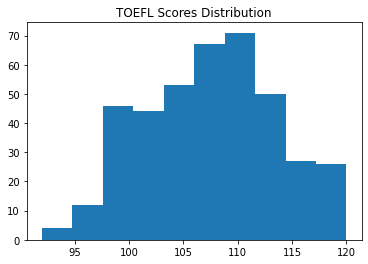

In [0]:
plt.hist(dataset.iloc[:,1].values)
plt.title('TOEFL Scores Distribution')
plt.show()

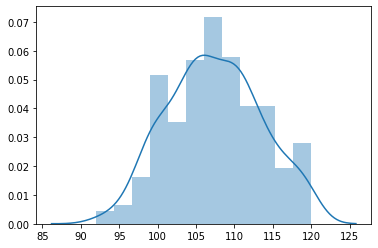

In [0]:
import seaborn as sns

sns.distplot(dataset.iloc[:,1].values)

In [0]:
# TOEFL Scores
toefl_median = np.median(dataset.iloc[:,1].values)
toefl_mean = np.mean(dataset.iloc[:,1].values)

print("TOEFL Scores Summary")
print("TOEFL Median: ", toefl_median)
print("TOEFL Mean: ", toefl_mean)

TOEFL Scores Summary
TOEFL Median:  107.0
TOEFL Mean:  107.41


### CGPA Distribution

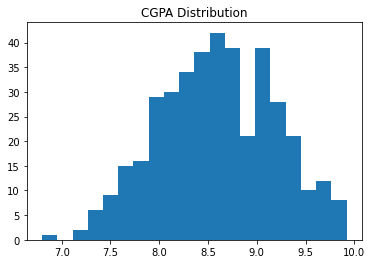

In [0]:
plt.hist(dataset.iloc[:,-3].values, bins=20)
plt.title('CGPA Distribution')
plt.show()

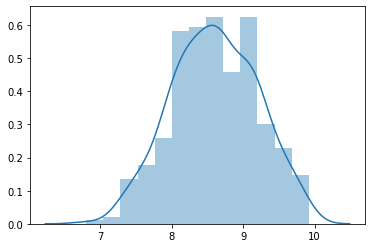

In [0]:
import seaborn as sns

sns.distplot(dataset.iloc[:,-3].values)

In [0]:
# GRE Scores
cgpa_median = np.median(dataset.iloc[:,-3].values)
cgpa_mean = np.mean(dataset.iloc[:,-3].values)

print("CGPA Scores Summary")
print("CGPA Median: ", cgpa_median)
print("CGPA Mean: ", cgpa_mean)

CGPA Scores Summary
CGPA Median:  8.61
CGPA Mean:  8.598925


### GRE vs Admit Probability

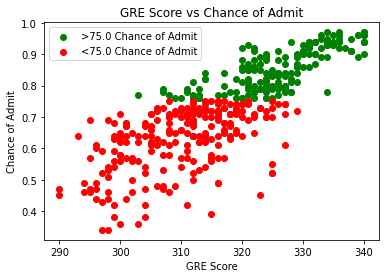

In [0]:
threshold = 0.75
plt.scatter(X[:,0][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,0][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.legend()
plt.show()

### TOEFL vs Chance of Admit

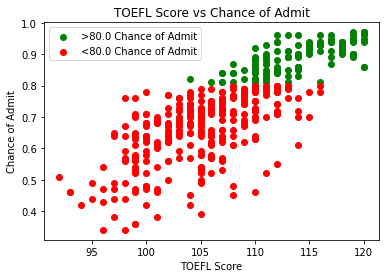

In [0]:
threshold = 0.8
plt.scatter(X[:,1][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,1][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')
plt.legend()
plt.show()

### GRE Score vs TOEFL Score

To compare How high scoring stuents GRE perform in TOEFL

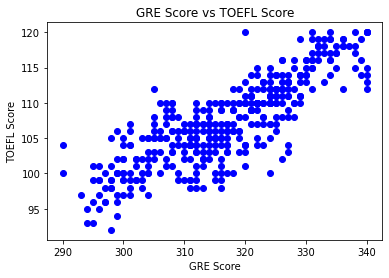

In [0]:
plt.scatter(X[:,0], X[:,1], color='blue')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('GRE Score vs TOEFL Score')
plt.show()

### CGPA vs Chance of Admit

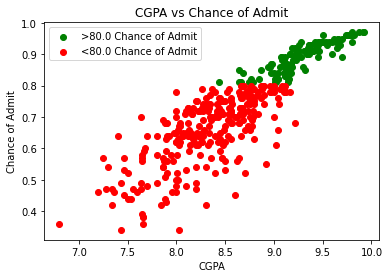

In [0]:
threshold = 0.8
plt.scatter(X[:,-2][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,-2][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')
plt.legend()
plt.show()

### CGPA vs GRE Score
To Compare how Academically well performing students score on GRE

No handles with labels found to put in legend.


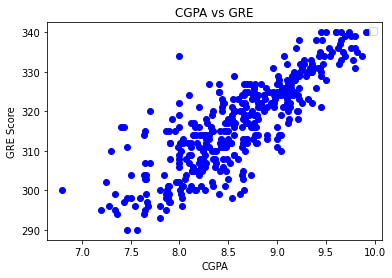

In [0]:
plt.scatter(X[:,-2], X[:,0], color='blue')
# plt.scatter(X_train[:,-2], X_train[:,0], color='blue', label='GRE')
# plt.scatter(X_train[:,-2], X_train[:,1], color='red', label='TOEFL')
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.title('CGPA vs GRE')
plt.legend()
plt.show()

## Split Dataset into Training and Test Dataset

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

def feature_scaler(X):
  sc = StandardScaler()
  X[:,:-1] = sc.fit_transform(X[:,:-1])  
  return X

X_train = feature_scaler(X_train)
X_test = feature_scaler(X_test)

## Building Machine Learning Models

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X_train, y_train)

In [0]:
y_pred_lr = linear_regressor.predict(X_test)

linear_regressor_score = round(linear_regressor.score(X_test, y_test)*100, 2)
linear_regressor_mas = mean_absolute_error(y_test,y_pred_lr)
linear_regressor_rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))

print('Accuracy Score: ',linear_regressor_score,'%')
print('Mean Absolute Error: ', linear_regressor_mas)
print('RMSE: ', linear_regressor_rmse)

Accuracy Score:  73.31 %
Mean Absolute Error:  0.05851815187428072
RMSE:  0.07327951623619465


In [0]:
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 0.7102209945871002
Coefficients: 
 [ 0.02327027  0.01463587  0.00588317 -0.00161317  0.01838813  0.07474922
  0.01226732]


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor = decision_tree_regressor.fit(X_train, y_train)

In [0]:
y_pred_dt = decision_tree_regressor.predict(X_test)

decision_tree_score = round(decision_tree_regressor.score(X_test, y_test)*100, 2)
decision_tree_mas = mean_absolute_error(y_test,y_pred_dt)
decision_tree_rmse = np.sqrt(mean_squared_error(y_test,y_pred_dt))

print('Accuracy: ', decision_tree_score,'%')
print('Mean Absolute Error: ', decision_tree_mas)
print('RMSE: ', decision_tree_rmse)

Accuracy:  54.34 %
Mean Absolute Error:  0.0698
RMSE:  0.09584362263604189


In [0]:
# tree.plot_tree(decision_tree_regressor)

### Random Forest Regression Model

In [0]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor = random_forest_regressor.fit(X_train, y_train)

In [0]:
y_pred_rf = random_forest_regressor.predict(X_test)

random_forest_score = round(random_forest_regressor.score(X_test, y_test)*100, 2)
random_forest_mas = mean_absolute_error(y_test,y_pred_rf)
random_forest_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print('Accuracy: ', random_forest_score,'%')
print('Mean Absolute Error: ', random_forest_mas)
print('RMSE: ', random_forest_rmse)

Accuracy:  69.96 %
Mean Absolute Error:  0.060029999999999986
RMSE:  0.07774489693864158


### SVR Model

In [0]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')
svr_regressor = svr_regressor.fit(X_train, y_train)

In [0]:
y_pred_svr = svr_regressor.predict(X_test)

svr_score = round(svr_regressor.score(X_test, y_test)*100, 2)
svr_mas = mean_absolute_error(y_test,y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test,y_pred_svr))

print('Accuracy: ', svr_score,'%')
print('Mean Absolute Error: ', svr_mas)
print('RMSE: ', svr_rmse)

Accuracy:  56.06 %
Mean Absolute Error:  0.08312414279215824
RMSE:  0.09402165010641242


In [0]:
df = pd.DataFrame({'Regression Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'SVR Model'],
                  'Accuracy Score': [linear_regressor_score, decision_tree_score, random_forest_score, svr_score],
                   'Mean Absolute Error': [linear_regressor_mas, decision_tree_mas, random_forest_mas, svr_mas],
                   'Root Mean Squared Error': [linear_regressor_rmse, decision_tree_rmse, random_forest_rmse, svr_rmse]},
                  columns= ['Regression Model', 'Accuracy Score', 'Mean Absolute Error', 'Root Mean Squared Error'])
print(df.to_markdown())

|    | Regression Model         |   Accuracy Score |   Mean Absolute Error |   Root Mean Squared Error |
|---:|:-------------------------|-----------------:|----------------------:|--------------------------:|
|  0 | Linear Regression        |            73.31 |             0.0585182 |                 0.0732795 |
|  1 | Decision Tree Regression |            54.34 |             0.0698    |                 0.0958436 |
|  2 | Random Forest Regression |            69.96 |             0.06003   |                 0.0777449 |
|  3 | SVR Model                |            56.06 |             0.0831241 |                 0.0940217 |


In [0]:
importance_frame = pd.DataFrame()
importance_frame['Importance'] = random_forest_regressor.feature_importances_
importance_frame['Features'] = dataset.columns[:-1]

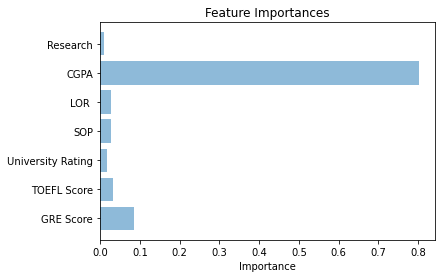

In [0]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()